# Whelks and lobsters -- context operator

## The system

In [1]:
R.<x,y> = QQ[]

In [2]:
from lbuc import *

In [3]:
us = [x,y]
k=RIF(0.8); b=RIF(0.6); c=RIF(0.3); e=RIF(0.05); f=RIF(2)
vf = vector([b*x*(RIF(1)-x) - c*x*(k-x)*y,
            -e*y*(RIF(1)+y)+f*x*(k-x)*y])
v0 = [RIF(0.5), RIF(2.0)]
v1 = [RIF(0.4), RIF(2.5)]
v3 = v2 = [RIF(1,1.5), RIF(4,8)]

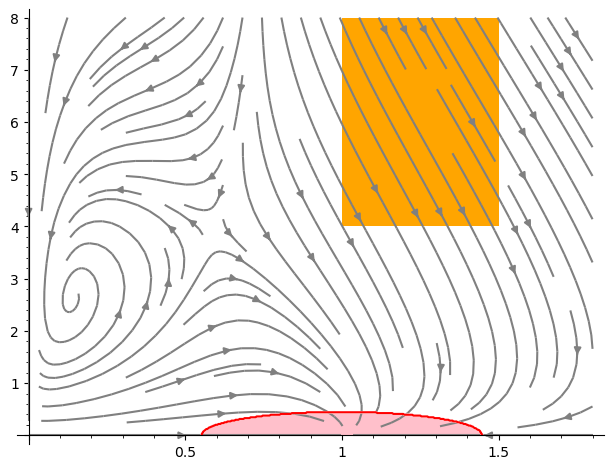

In [4]:
p = streamline_plot(tuple(vf),(x,0,1.8),(y,0,8), color='grey')\
    + polygon([(v3[0].lower(), v3[1].lower()),
               (v3[0].lower(), v3[1].upper()),
               (v3[0].upper(), v3[1].upper()),
               (v3[0].upper(), v3[1].lower())],
              color='orange')\
    + region_plot((lambda x, y: (x - 1)^2 + y^2 - 0.2 < 0),
                  (x, 0, 1.6),
                  (y, 0, 8),
                  incol='pink', plot_points=500, bordercol='red')
p.set_aspect_ratio(1/6)
p.show()
#    + point(v0, size=100, marker='X', color='red')\
#    + point(v1, size=100, marker='X', color='green')\


## Polynomial plot

In [5]:
reach = Reach(vf, v3, 10,
              order=5, step=(0.01, 0.5),
              precondition=1,
              estimation=1e-3,
              integrationScheme=2,
              cutoff_threshold=1e-7,
              symbolic_composition=True)

In [6]:
reach.wplot(u'x', u'y')

Exception: Not ran!

In [7]:
p1 = p + reach.sage_interval_plot(u'x', u'y',
                                  poly=(x - 1)^2 + y^2 - 0.2,
                                  aspect_ratio='automatic')
p1

var_id_x = 0
var_id_y = 1
PolyObserver(x^2 + y^2 - 2.00000000000000*x + 0.800000000000000, <flowstar.reachability.Reach object at 0x7f6312088280>, None, symbolic_composition=True, symbolic_composition_order=-1, tentative_unpreconditioning=False, mask=None)


FlowstarFailedException: Not ran!

## Simple signal

In [27]:
P = Atomic((x - 1)^2 + y^2 - 0.2)

In [28]:
sig = P.signal_for_system(vf, v3, 5, order=5, step=0.01,
                    precondition=1,
                    estimation=1e-3,
                    integration_method=2,
                    cutoff_threshold=1e-5,
                    symbolic_composition=True)
q = sig.plot(); q

phi variables sfs = {y, x}
system sfs = System(R, (x, y), [[1.0000000000000000 .. 1.5000000000000000], [4 .. 8]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y}))


FlowstarFailedException: Did not run successfully!
status = 4
num_flowpipes = 8

phi variables sfs = {y, x}
system sfs = System(R, (x, y), [[1.0000000000000000 .. 1.5000000000000000], [4 .. 8]], (0.29999999999999999?*x^2*y - 0.59999999999999998?*x^2 - 0.2400000000000000?*x*y + 0.59999999999999998?*x, -2*x^2*y + 1.6000000000000001?*x*y - 0.050000000000000003?*y^2 - 0.050000000000000003?*y), varmap=bidict({'x': x, 'y': y}))
Generating Reach Tree: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(x^2 + y^2 - 2.00000000000000*x + 0.800000000000000)>, precompose_systems=False, order=5, step=0.0100000000000000, precondition=1, estimation=0.00100000000000000, integrationScheme=2, cutoff_threshold=0.0000100000000000000, symbolic_composition=True, instrumentor=<flowstar.instrumentation.AggregateMetric object at 0x7f630c145ec0>, print_timings=False, unpreconditioning_order=5, initial_form=<InitialForm.SPLIT_VARS: 3>), reach_tree = <lbuc.reach_trees.ReachTree object at 0x7f630c129f70>, ctx_ma

/usr/lib64/python3.8/site-packages/sage/plot/contour_plot.py:203: UserWarning: No contour levels were found within the data range.
  CS = subplot.contour(self.xy_data_array, contours, cmap=cmap,


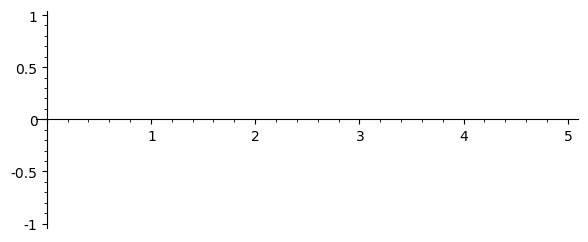

In [29]:
csig = P.context_signal_for_system(vf, v3, 5, order=5, step=0.01,
                           precondition=1,
                           estimation=1e-3,
                           integrationScheme=2,
                           cutoff_threshold=1e-5,
                           symbolic_composition=True)
csig.signal.plot()

In [30]:
ps = graphics_array(
    [c.signal.plot() for c in csig.children],
    4,
    1
)

 ==> creating ContextSignal with coord=(0,), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(x^2 + y^2 - 2.00000000000000*x + 0.800000000000000)>, precompose_systems=False, order=5, step=0.0100000000000000, precondition=1, estimation=0.00100000000000000, integrationScheme=2, cutoff_threshold=0.0000100000000000000, symbolic_composition=True, instrumentor=<flowstar.instrumentation.AggregateMetric object at 0x7f630c145ec0>, print_timings=False, unpreconditioning_order=5, initial_form=<InitialForm.SPLIT_VARS: 3>), reach_tree = <lbuc.reach_trees.ReachTree object at 0x7f630c129f70>, ctx_mask=None
recomputing reachset
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62fa258a60>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*x*y - 0.10000000000000001?*y^2 - 1.2000000000000000?*x, s

/usr/lib64/python3.8/site-packages/sage/plot/contour_plot.py:203: UserWarning: No contour levels were found within the data range.
  CS = subplot.contour(self.xy_data_array, contours, cmap=cmap,


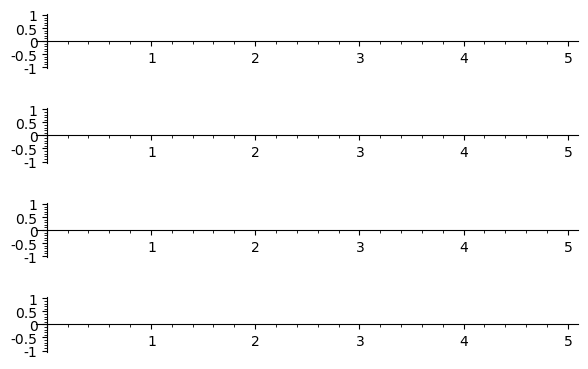

In [31]:
ps.show(aspect_ratio=1/4)

In [32]:
q = csig.plot_histogram2d(1)

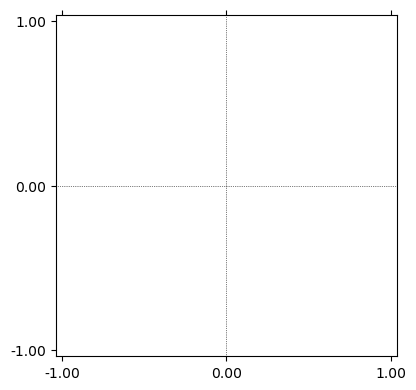

In [33]:
q.show()

In [34]:
pps = graphics_array(
    [c.signal.plot() for c in csig.children[1].children],
    4,
    1
)

 ==> creating ContextSignal with coord=(1, 0), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(x^2 + y^2 - 2.00000000000000*x + 0.800000000000000)>, precompose_systems=False, order=5, step=0.0100000000000000, precondition=1, estimation=0.00100000000000000, integrationScheme=2, cutoff_threshold=0.0000100000000000000, symbolic_composition=True, instrumentor=<flowstar.instrumentation.AggregateMetric object at 0x7f630c145ec0>, print_timings=False, unpreconditioning_order=5, initial_form=<InitialForm.SPLIT_VARS: 3>), reach_tree = <lbuc.reach_trees.ReachTree object at 0x7f630c129f70>, ctx_mask=None
contexts = ['[1.0..1.25]', '[6.0..8.0]']
statics  = []
recomputing reachset
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f62fa258940>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*

/usr/lib64/python3.8/site-packages/sage/plot/contour_plot.py:203: UserWarning: No contour levels were found within the data range.
  CS = subplot.contour(self.xy_data_array, contours, cmap=cmap,


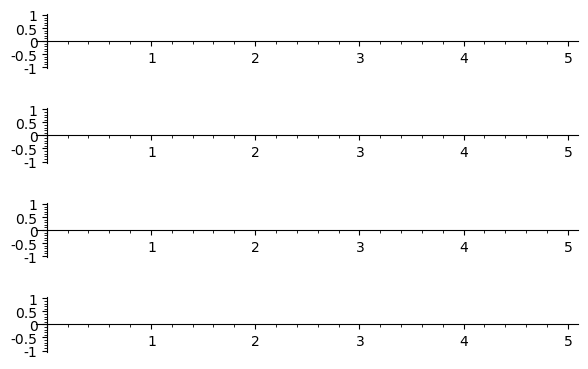

In [35]:
pps.show(aspect_ratio=1/4)

In [36]:
sig = csig.children[1].refined_signal(1)

/usr/lib64/python3.8/site-packages/sage/plot/contour_plot.py:203: UserWarning: No contour levels were found within the data range.
  CS = subplot.contour(self.xy_data_array, contours, cmap=cmap,


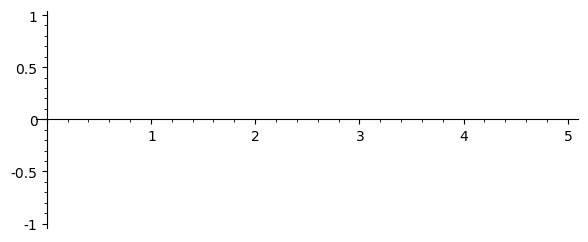

In [37]:
sig.plot()

In [38]:
sig = csig.refined_signal(1)

/usr/lib64/python3.8/site-packages/sage/plot/contour_plot.py:203: UserWarning: No contour levels were found within the data range.
  CS = subplot.contour(self.xy_data_array, contours, cmap=cmap,


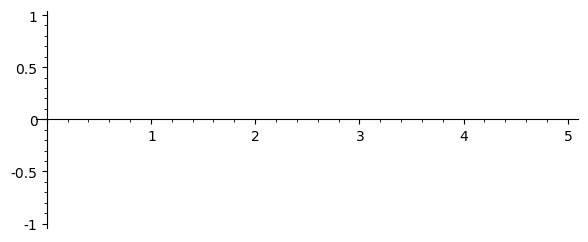

In [39]:
sig.plot()

In [40]:
sig = csig.refined_signal(2)

 ==> creating ContextSignal with coord=(0, 0), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(x^2 + y^2 - 2.00000000000000*x + 0.800000000000000)>, precompose_systems=False, order=5, step=0.0100000000000000, precondition=1, estimation=0.00100000000000000, integrationScheme=2, cutoff_threshold=0.0000100000000000000, symbolic_composition=True, instrumentor=<flowstar.instrumentation.AggregateMetric object at 0x7f630c145ec0>, print_timings=False, unpreconditioning_order=5, initial_form=<InitialForm.SPLIT_VARS: 3>), reach_tree = <lbuc.reach_trees.ReachTree object at 0x7f630c129f70>, ctx_mask=None
contexts = ['[1.0..1.25]', '[4.0..6.0]']
statics  = []
recomputing reachset
PolyObserver(x^2 + y^2 - 2*x + 0.80000000000000005?, <flowstar.reachability.Reach object at 0x7f63342a3a60>, 0.59999999999999998?*x^3*y - 4*x^2*y^2 - 1.2000000000000000?*x^3 - 1.080000000000000?*x^2*y + 3.2000000000000002?*x*y^2 - 0.10000000000000001?*y^3 + 2.4000000000000000?*x^2 + 0.4800000000000000?*

top-level root detection: 1 items in 2.26 seconds
roots = [[0.61999999999999422 .. 2.3300000000000094]]
domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[0.61999999999999422 .. 2.3300000000000094]]
seg_domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[0.61999999999999422 .. 2.3300000000000094]]
signal given bool roots: 1 items in 0.02 seconds
 ==> creating ContextSignal with coord=(0, 1), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 0.61999999999999423], True), ([2.3300000000000093 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 2), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(x^2 + y^2 - 2.00000000000000*x + 0.800000000000000)>, precompose_systems=False, order=5, step=0.0100000000000000, precondition=1, estimation=0.00100000000000000, integrationScheme=2, cutoff_threshold=0.0000100000000000000, symbolic_composition=True, instru

top-level root detection: 1 items in 2.23 seconds
roots = [[0.61999999999999422 .. 2.3300000000000094]]
domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[0.61999999999999422 .. 2.3300000000000094]]
seg_domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[0.61999999999999422 .. 2.3300000000000094]]
signal given bool roots: 1 items in 0.01 seconds
 ==> creating ContextSignal with coord=(0, 3), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 0.61999999999999423], True), ([2.3300000000000093 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 0), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(x^2 + y^2 - 2.00000000000000*x + 0.800000000000000)>, precompose_systems=False, order=5, step=0.0100000000000000, precondition=1, estimation=0.00100000000000000, integrationScheme=2, cutoff_threshold=0.0000100000000000000, symbolic_composition=True, instru

top-level root detection: 1 items in 0.83 seconds
roots = [[0.51999999999999635 .. 0.63000000000000056], [0.63517164390064095 .. 0.64000000000000057], [0.64556636583195925 .. 0.65000000000000058], [0.65596095436999612 .. 0.66000000000000059], [0.66638663704655087 .. 0.67000000000000060], [0.67678289245264966 .. 0.68000000000000061], [0.68721366225307667 .. 0.69000000000000062], [0.69767674917211264 .. 0.70000000000000063], [0.70817297203133500 .. 0.71000000000000064], [0.71870024178005220 .. 0.72000000000000064], [0.72925486551419371 .. 0.73000000000000065], [0.73983005683913327 .. 0.74000000000000066], [0.83967981748285291 .. 0.84000000000000075], [0.84935954349535169 .. 0.85000000000000076], [0.85903490549890804 .. 0.86000000000000077], [0.86869983005287043 .. 0.87000000000000078], [0.87834519418895951 .. 0.88000000000000079], [0.88798169582154629 .. 0.89000000000000080], [0.89739577258774894 .. 0.90000000000000080], [0.90646436595304236 .. 0.91000000000000081], [0.91550800692211586 

top-level root detection: 1 items in 0.78 seconds
roots = [[0.51999999999999635 .. 0.63000000000000056], [0.63517164390064095 .. 0.64000000000000057], [0.64556636583195925 .. 0.65000000000000058], [0.65596095436999612 .. 0.66000000000000059], [0.66638663704655087 .. 0.67000000000000060], [0.67678289245264966 .. 0.68000000000000061], [0.68721366225307667 .. 0.69000000000000062], [0.69767674917211264 .. 0.70000000000000063], [0.70817297203133500 .. 0.71000000000000064], [0.71870024178005220 .. 0.72000000000000064], [0.72925486551419371 .. 0.73000000000000065], [0.73983005683913327 .. 0.74000000000000066], [0.83967981748285291 .. 0.84000000000000075], [0.84935954349535169 .. 0.85000000000000076], [0.85903490549890804 .. 0.86000000000000077], [0.86869983005287043 .. 0.87000000000000078], [0.87834519418895951 .. 0.88000000000000079], [0.88798169582154629 .. 0.89000000000000080], [0.89739577258774894 .. 0.90000000000000080], [0.90646436595304236 .. 0.91000000000000081], [0.91550800692211586 

top-level root detection: 1 items in 0.88 seconds
roots = [[0.51999999999999635 .. 0.63000000000000056], [0.63517164390064095 .. 0.64000000000000057], [0.64556636583195925 .. 0.65000000000000058], [0.65596095436999612 .. 0.66000000000000059], [0.66638663704655087 .. 0.67000000000000060], [0.67678289245264966 .. 0.68000000000000061], [0.68721366225307667 .. 0.69000000000000062], [0.69767674917211264 .. 0.70000000000000063], [0.70817297203133500 .. 0.71000000000000064], [0.71870024178005220 .. 0.72000000000000064], [0.72925486551419371 .. 0.73000000000000065], [0.73983005683913327 .. 0.74000000000000066], [0.83967981748285291 .. 0.84000000000000075], [0.84935954349535169 .. 0.85000000000000076], [0.85903490549890804 .. 0.86000000000000077], [0.86869983005287043 .. 0.87000000000000078], [0.87834519418895951 .. 0.88000000000000079], [0.88798169582154629 .. 0.89000000000000080], [0.89739577258774894 .. 0.90000000000000080], [0.90646436595304236 .. 0.91000000000000081], [0.91550800692211586 

top-level root detection: 1 items in 1.85 seconds
roots = [[1.2368879544725610 .. 1.2400000000000012], [1.2405655055331505 .. 1.5500000000000014]]
domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.2368879544725610 .. 1.2400000000000012], 
 [1.2405655055331505 .. 1.5500000000000014]]
seg_domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.2368879544725610 .. 1.2400000000000012], 
 [1.2405655055331505 .. 1.5500000000000014]]
signal given bool roots: 1 items in 0.01 seconds
 ==> creating ContextSignal with coord=(3, 0), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.2368879544725611], True), ([1.2400000000000011 .. 1.2405655055331506], True), ([1.5500000000000013 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 1), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(x^2 + y^2 - 2.00000000000000*x + 0.800000000000000)>, precompose_systems

top-level root detection: 1 items in 0.96 seconds
roots = [[1.2368879544725610 .. 1.2400000000000012], [1.2405655055331505 .. 1.5500000000000014]]
domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.2368879544725610 .. 1.2400000000000012], 
 [1.2405655055331505 .. 1.5500000000000014]]
seg_domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.2368879544725610 .. 1.2400000000000012], 
 [1.2405655055331505 .. 1.5500000000000014]]
signal given bool roots: 1 items in 0.01 seconds
 ==> creating ContextSignal with coord=(3, 2), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.2368879544725611], True), ([1.2400000000000011 .. 1.2405655055331506], True), ([1.5500000000000013 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 3), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(x^2 + y^2 - 2.00000000000000*x + 0.800000000000000)>, precompose_systems

/usr/lib64/python3.8/site-packages/sage/plot/contour_plot.py:203: UserWarning: No contour levels were found within the data range.
  CS = subplot.contour(self.xy_data_array, contours, cmap=cmap,


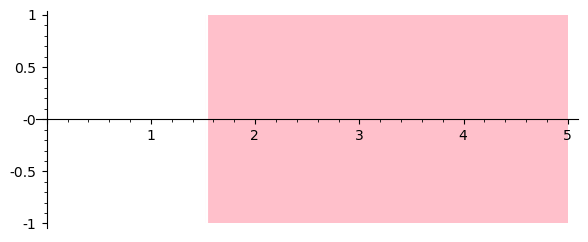

In [41]:
sig.plot()

In [42]:
q = csig.plot_histogram2d(2)

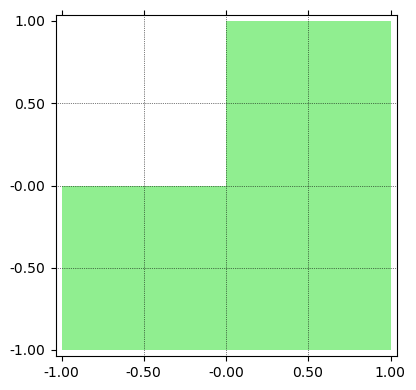

In [43]:
q.show()

In [44]:
csig.F(RIF(2)).histogram2d(2)

 ==> creating ContextSignal with coord=(), signal = Signal([0.0000000000000000 .. 3.0000000000000000], [], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0,), signal = Signal([0.0000000000000000 .. 3.0000000000000000], [], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1,), signal = Signal([0.0000000000000000 .. 3.0000000000000000], [], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2,), signal = Signal([0.0000000000000000 .. 3.0000000000000000], [], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3,), signal = Signal([0.0000000000000000 .. 3.0000000000000000], [], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 0), signal = Signal([0.0000000000000000 .. 3.0000000000000000], [([0.33000000000000939 .. 3.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSig

[ 0  0|-1 -1]
[ 0  0|-1 -1]
[-----+-----]
[ 0  0|-1 -1]
[ 0  0|-1 -1]

In [45]:
q = csig.F(RIF(2)).plot_histogram2d(2)

 ==> creating ContextSignal with coord=(), signal = Signal([0.0000000000000000 .. 3.0000000000000000], [], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0,), signal = Signal([0.0000000000000000 .. 3.0000000000000000], [], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1,), signal = Signal([0.0000000000000000 .. 3.0000000000000000], [], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2,), signal = Signal([0.0000000000000000 .. 3.0000000000000000], [], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3,), signal = Signal([0.0000000000000000 .. 3.0000000000000000], [], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 0), signal = Signal([0.0000000000000000 .. 3.0000000000000000], [([0.33000000000000939 .. 3.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSig

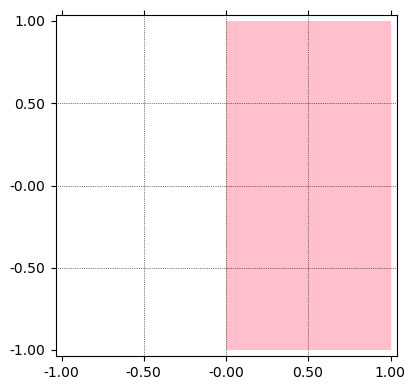

In [46]:
q.show()

In [47]:
q = csig.F(RIF(2)).plot_histogram2d(3)

 ==> creating ContextSignal with coord=(), signal = Signal([0.0000000000000000 .. 3.0000000000000000], [], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0,), signal = Signal([0.0000000000000000 .. 3.0000000000000000], [], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1,), signal = Signal([0.0000000000000000 .. 3.0000000000000000], [], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2,), signal = Signal([0.0000000000000000 .. 3.0000000000000000], [], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3,), signal = Signal([0.0000000000000000 .. 3.0000000000000000], [], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 0), signal = Signal([0.0000000000000000 .. 3.0000000000000000], [([0.33000000000000939 .. 3.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSig

top-level root detection: 1 items in 1.87 seconds
roots = [[1.9463224572162949 .. 2.2672954431043038], [2.2699999999999249 .. 2.2800000000000083]]
domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.9463224572162949 .. 2.2672954431043038], 
 [2.2699999999999249 .. 2.2800000000000083]]
seg_domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.9463224572162949 .. 2.2672954431043038], 
 [2.2699999999999249 .. 2.2800000000000083]]
signal given bool roots: 1 items in 0.01 seconds
 ==> creating ContextSignal with coord=(0, 0, 1), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.9463224572162950], True), ([2.2672954431043037 .. 2.2699999999999250], False), ([2.2800000000000082 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 0, 1), signal = Signal([0.0000000000000000 .. 3.0000000000000000], [([0.26729544310430375 .. 0.26999999999992497], False), ([0.2800000000000

top-level root detection: 1 items in 1.85 seconds
roots = [[1.8650962568805955 .. 2.2112967459653814], [4.2299999999997854 .. 4.2400000000000642]]
domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.8650962568805955 .. 2.2112967459653814], 
 [4.2299999999997854 .. 4.2400000000000642]]
seg_domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.8650962568805955 .. 2.2112967459653814], 
 [4.2299999999997854 .. 4.2400000000000642]]
signal given bool roots: 1 items in 0.01 seconds
 ==> creating ContextSignal with coord=(0, 1, 0), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.8650962568805956], True), ([2.2112967459653813 .. 4.2299999999997855], False), ([4.2400000000000641 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 1, 0), signal = Signal([0.0000000000000000 .. 3.0000000000000000], [([0.21129674596538139 .. 2.2299999999997855], False), ([2.24000000000006

top-level root detection: 1 items in 2.01 seconds
roots = [[1.3799999999999696 .. 1.3900000000000013], [1.6091535417526565 .. 1.6100000000000015], [1.6140121843287795 .. 1.9500000000000018]]
domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.3799999999999696 .. 1.3900000000000013], 
 [1.6091535417526565 .. 1.6100000000000015], 
 [1.6140121843287795 .. 1.9500000000000018]]
seg_domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.3799999999999696 .. 1.3900000000000013], 
 [1.6091535417526565 .. 1.6100000000000015], 
 [1.6140121843287795 .. 1.9500000000000018]]
signal given bool roots: 1 items in 0.02 seconds
 ==> creating ContextSignal with coord=(0, 1, 3), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.3799999999999697], True), ([1.3900000000000012 .. 1.6091535417526566], True), ([1.6100000000000014 .. 1.6140121843287796], True), ([1.9500000000000017 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=N

top-level root detection: 1 items in 1.91 seconds
roots = [[1.4582660109257190 .. 1.4600000000000013], [1.4631298990111827 .. 1.8500000000000017], [1.8899999999999474 .. 1.9000000000000017], [2.8599999999998861 .. 2.8700000000000219]]
domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.4582660109257190 .. 1.4600000000000013], 
 [1.4631298990111827 .. 1.8500000000000017], 
 [1.8899999999999474 .. 1.9000000000000017], 
 [2.8599999999998861 .. 2.8700000000000219]]
seg_domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.4582660109257190 .. 1.4600000000000013], 
 [1.4631298990111827 .. 1.8500000000000017], 
 [1.8899999999999474 .. 1.9000000000000017], 
 [2.8599999999998861 .. 2.8700000000000219]]
signal given bool roots: 1 items in 0.04 seconds
 ==> creating ContextSignal with coord=(0, 2, 1), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.4582660109257191], True), ([1.4600000000000012 .. 1.4631298990111828], True), ([1.8500000

top-level root detection: 1 items in 2.04 seconds
roots = [[1.0299999999999849 .. 1.9000000000000017], [3.3599999999998533 .. 3.3700000000000335]]
domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.0299999999999849 .. 1.9000000000000017], 
 [3.3599999999998533 .. 3.3700000000000335]]
seg_domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.0299999999999849 .. 1.9000000000000017], 
 [3.3599999999998533 .. 3.3700000000000335]]
signal given bool roots: 1 items in 0.01 seconds
 ==> creating ContextSignal with coord=(0, 2, 3), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.0299999999999850], True), ([1.9000000000000016 .. 3.3599999999998534], False), ([3.3700000000000334 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 2, 3), signal = Signal([0.0000000000000000 .. 3.0000000000000000], [([0.0000000000000000 .. 1.3599999999998534], False), ([1.370000000000033

top-level root detection: 1 items in 1.96 seconds
roots = [[1.3571838724389657 .. 1.3600000000000013], [1.3605530133512797 .. 1.8500000000000017]]
domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.3571838724389657 .. 1.3600000000000013], 
 [1.3605530133512797 .. 1.8500000000000017]]
seg_domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.3571838724389657 .. 1.3600000000000013], 
 [1.3605530133512797 .. 1.8500000000000017]]
signal given bool roots: 1 items in 0.02 seconds
 ==> creating ContextSignal with coord=(0, 3, 1), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.3571838724389658], True), ([1.3600000000000012 .. 1.3605530133512798], True), ([1.8500000000000016 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 3, 1), signal = Signal([0.0000000000000000 .. 3.0000000000000000], [([0.0000000000000000 .. 3.0000000000000000], False)], mask=None), reach_t

top-level root detection: 1 items in 2.09 seconds
roots = [[1.0199999999999853 .. 1.9400000000000018], [2.2599999999999256 .. 2.2700000000000081]]
domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.0199999999999853 .. 1.9400000000000018], 
 [2.2599999999999256 .. 2.2700000000000081]]
seg_domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.0199999999999853 .. 1.9400000000000018], 
 [2.2599999999999256 .. 2.2700000000000081]]
signal given bool roots: 1 items in 0.02 seconds
 ==> creating ContextSignal with coord=(0, 3, 3), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.0199999999999854], True), ([1.9400000000000017 .. 2.2599999999999257], False), ([2.2700000000000080 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(0, 3, 3), signal = Signal([0.0000000000000000 .. 3.0000000000000000], [([0.0000000000000000 .. 0.25999999999992563], False), ([0.27000000000000

top-level root detection: 1 items in 0.71 seconds
roots = [[1.2493074377575377 .. 1.2500000000000012], [1.2579676518208757 .. 1.2600000000000012], [1.2666338034880662 .. 1.2700000000000012], [1.2753050826692291 .. 2.1015132556227126]]
domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.2493074377575377 .. 1.2500000000000012], 
 [1.2579676518208757 .. 1.2600000000000012], 
 [1.2666338034880662 .. 1.2700000000000012], 
 [1.2753050826692291 .. 2.1015132556227126]]
seg_domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.2493074377575377 .. 1.2500000000000012], 
 [1.2579676518208757 .. 1.2600000000000012], 
 [1.2666338034880662 .. 1.2700000000000012], 
 [1.2753050826692291 .. 2.1015132556227126]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(1, 0, 1), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.2493074377575378], True), ([1.2500000000000011 .. 1.2579676518208758], True), ([1.2600000

top-level root detection: 1 items in 0.76 seconds
roots = [[1.2493074377575377 .. 1.2500000000000012], [1.2579676518208757 .. 1.2600000000000012], [1.2666338034880662 .. 1.2700000000000012], [1.2753050826692291 .. 2.1015132556227126]]
domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.2493074377575377 .. 1.2500000000000012], 
 [1.2579676518208757 .. 1.2600000000000012], 
 [1.2666338034880662 .. 1.2700000000000012], 
 [1.2753050826692291 .. 2.1015132556227126]]
seg_domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.2493074377575377 .. 1.2500000000000012], 
 [1.2579676518208757 .. 1.2600000000000012], 
 [1.2666338034880662 .. 1.2700000000000012], 
 [1.2753050826692291 .. 2.1015132556227126]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(1, 0, 3), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.2493074377575378], True), ([1.2500000000000011 .. 1.2579676518208758], True), ([1.2600000

top-level root detection: 1 items in 0.79 seconds
roots = [[1.1095130144701599 .. 1.1100000000000010], [1.1185781080212042 .. 1.1200000000000010], [1.1276713879156323 .. 1.1300000000000011], [1.1367926239100876 .. 1.1400000000000011], [1.1459408792753444 .. 1.1500000000000011], [1.1551132493743467 .. 2.0000000000000018]]
domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.1095130144701599 .. 1.1100000000000010], 
 [1.1185781080212042 .. 1.1200000000000010], 
 [1.1276713879156323 .. 1.1300000000000011], 
 [1.1367926239100876 .. 1.1400000000000011], 
 [1.1459408792753444 .. 1.1500000000000011], 
 [1.1551132493743467 .. 2.0000000000000018]]
seg_domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.1095130144701599 .. 1.1100000000000010], 
 [1.1185781080212042 .. 1.1200000000000010], 
 [1.1276713879156323 .. 1.1300000000000011], 
 [1.1367926239100876 .. 1.1400000000000011], 
 [1.1459408792753444 .. 1.1500000000000011], 
 [1.1551132493743467 .. 2.0000000000000018]]
sig

top-level root detection: 1 items in 0.76 seconds
roots = [[1.1095130144701599 .. 1.1100000000000010], [1.1185781080212042 .. 1.1200000000000010], [1.1276713879156323 .. 1.1300000000000011], [1.1367926239100876 .. 1.1400000000000011], [1.1459408792753444 .. 1.1500000000000011], [1.1551132493743467 .. 2.0000000000000018]]
domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.1095130144701599 .. 1.1100000000000010], 
 [1.1185781080212042 .. 1.1200000000000010], 
 [1.1276713879156323 .. 1.1300000000000011], 
 [1.1367926239100876 .. 1.1400000000000011], 
 [1.1459408792753444 .. 1.1500000000000011], 
 [1.1551132493743467 .. 2.0000000000000018]]
seg_domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.1095130144701599 .. 1.1100000000000010], 
 [1.1185781080212042 .. 1.1200000000000010], 
 [1.1276713879156323 .. 1.1300000000000011], 
 [1.1367926239100876 .. 1.1400000000000011], 
 [1.1459408792753444 .. 1.1500000000000011], 
 [1.1551132493743467 .. 2.0000000000000018]]
sig

top-level root detection: 1 items in 0.41 seconds
roots = [[1.3487309346471210 .. 1.3500000000000012], [1.3560940138564296 .. 1.7100000000000016]]
domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.3487309346471210 .. 1.3500000000000012], 
 [1.3560940138564296 .. 1.7100000000000016]]
seg_domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.3487309346471210 .. 1.3500000000000012], 
 [1.3560940138564296 .. 1.7100000000000016]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(1, 2, 1), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.3487309346471211], True), ([1.3500000000000011 .. 1.3560940138564297], True), ([1.7100000000000015 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 2, 1), signal = Signal([0.0000000000000000 .. 3.0000000000000000], [([0.0000000000000000 .. 3.0000000000000000], False)], mask=None), reach_t

top-level root detection: 1 items in 0.54 seconds
roots = [[1.3487309346471210 .. 1.3500000000000012], [1.3560940138564296 .. 1.7100000000000016]]
domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.3487309346471210 .. 1.3500000000000012], 
 [1.3560940138564296 .. 1.7100000000000016]]
seg_domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.3487309346471210 .. 1.3500000000000012], 
 [1.3560940138564296 .. 1.7100000000000016]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(1, 2, 3), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.3487309346471211], True), ([1.3500000000000011 .. 1.3560940138564297], True), ([1.7100000000000015 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 2, 3), signal = Signal([0.0000000000000000 .. 3.0000000000000000], [([0.0000000000000000 .. 3.0000000000000000], False)], mask=None), reach_t

top-level root detection: 1 items in 0.40 seconds
roots = [[1.4169623132567608 .. 1.4200000000000013], [1.4201300955298430 .. 1.6664356048135279]]
domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.4169623132567608 .. 1.4200000000000013], 
 [1.4201300955298430 .. 1.6664356048135279]]
seg_domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.4169623132567608 .. 1.4200000000000013], 
 [1.4201300955298430 .. 1.6664356048135279]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(1, 3, 1), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.4169623132567609], True), ([1.4200000000000012 .. 1.4201300955298431], True), ([1.6664356048135278 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 3, 1), signal = Signal([0.0000000000000000 .. 3.0000000000000000], [([0.0000000000000000 .. 3.0000000000000000], False)], mask=None), reach_t

top-level root detection: 1 items in 0.46 seconds
roots = [[1.4169623132567608 .. 1.4200000000000013], [1.4201300955298430 .. 1.6664356048135279]]
domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.4169623132567608 .. 1.4200000000000013], 
 [1.4201300955298430 .. 1.6664356048135279]]
seg_domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.4169623132567608 .. 1.4200000000000013], 
 [1.4201300955298430 .. 1.6664356048135279]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(1, 3, 3), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.4169623132567609], True), ([1.4200000000000012 .. 1.4201300955298431], True), ([1.6664356048135278 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(1, 3, 3), signal = Signal([0.0000000000000000 .. 3.0000000000000000], [([0.0000000000000000 .. 3.0000000000000000], False)], mask=None), reach_t

top-level root detection: 1 items in 0.35 seconds
roots = [[1.3882253519430338 .. 1.5101988367039570]]
domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.3882253519430338 .. 1.5101988367039570]]
seg_domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.3882253519430338 .. 1.5101988367039570]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(2, 0, 1), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.3882253519430339], True), ([1.5101988367039569 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 0, 1), signal = Signal([0.0000000000000000 .. 3.0000000000000000], [([0.0000000000000000 .. 3.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 0, 2), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(x^2 + y^2 - 2.00000000000000*x + 0.800000000

top-level root detection: 1 items in 0.33 seconds
roots = [[1.3837260798232855 .. 1.5100000000000014]]
domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.3837260798232855 .. 1.5100000000000014]]
seg_domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.3837260798232855 .. 1.5100000000000014]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(2, 1, 0), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.3837260798232856], True), ([1.5100000000000013 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 1, 0), signal = Signal([0.0000000000000000 .. 3.0000000000000000], [([0.0000000000000000 .. 3.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 1, 1), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(x^2 + y^2 - 2.00000000000000*x + 0.800000000

top-level root detection: 1 items in 0.33 seconds
roots = [[1.3432125216460195 .. 1.4428994087791643]]
domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.3432125216460195 .. 1.4428994087791643]]
seg_domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.3432125216460195 .. 1.4428994087791643]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(2, 1, 3), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.3432125216460196], True), ([1.4428994087791642 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 1, 3), signal = Signal([0.0000000000000000 .. 3.0000000000000000], [([0.0000000000000000 .. 3.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 2, 0), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(x^2 + y^2 - 2.00000000000000*x + 0.800000000

top-level root detection: 1 items in 0.38 seconds
roots = [[1.0688763159345056 .. 1.0700000000000010], [1.0753169109030786 .. 1.3604961600789219]]
domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.0688763159345056 .. 1.0700000000000010], 
 [1.0753169109030786 .. 1.3604961600789219]]
seg_domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.0688763159345056 .. 1.0700000000000010], 
 [1.0753169109030786 .. 1.3604961600789219]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(2, 2, 2), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.0688763159345057], True), ([1.0700000000000009 .. 1.0753169109030787], True), ([1.3604961600789218 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 2, 2), signal = Signal([0.0000000000000000 .. 3.0000000000000000], [([0.0000000000000000 .. 3.0000000000000000], False)], mask=None), reach_t

top-level root detection: 1 items in 0.43 seconds
roots = [[1.2982625054737226 .. 1.4134269866910266]]
domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.2982625054737226 .. 1.4134269866910266]]
seg_domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.2982625054737226 .. 1.4134269866910266]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(2, 3, 1), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.2982625054737227], True), ([1.4134269866910265 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 3, 1), signal = Signal([0.0000000000000000 .. 3.0000000000000000], [([0.0000000000000000 .. 3.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(2, 3, 2), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(x^2 + y^2 - 2.00000000000000*x + 0.800000000

top-level root detection: 1 items in 0.40 seconds
roots = [[1.4164002848157126 .. 1.5059698582484576]]
domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.4164002848157126 .. 1.5059698582484576]]
seg_domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.4164002848157126 .. 1.5059698582484576]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(3, 0, 0), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.4164002848157127], True), ([1.5059698582484575 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 0, 0), signal = Signal([0.0000000000000000 .. 3.0000000000000000], [([0.0000000000000000 .. 3.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 0, 1), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(x^2 + y^2 - 2.00000000000000*x + 0.800000000

top-level root detection: 1 items in 0.36 seconds
roots = [[1.4010655776585072 .. 1.4547300893152076]]
domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.4010655776585072 .. 1.4547300893152076]]
seg_domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.4010655776585072 .. 1.4547300893152076]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(3, 0, 3), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.4010655776585073], True), ([1.4547300893152075 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 0, 3), signal = Signal([0.0000000000000000 .. 3.0000000000000000], [([0.0000000000000000 .. 3.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 1, 0), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(x^2 + y^2 - 2.00000000000000*x + 0.800000000

top-level root detection: 1 items in 0.33 seconds
roots = [[1.4153206310072241 .. 1.4686287976636832]]
domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.4153206310072241 .. 1.4686287976636832]]
seg_domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.4153206310072241 .. 1.4686287976636832]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(3, 1, 2), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.4153206310072242], True), ([1.4686287976636831 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 1, 2), signal = Signal([0.0000000000000000 .. 3.0000000000000000], [([0.0000000000000000 .. 3.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 1, 3), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(x^2 + y^2 - 2.00000000000000*x + 0.800000000

top-level root detection: 1 items in 0.34 seconds
roots = [[1.3708534092419539 .. 1.4300000000000013]]
domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.3708534092419539 .. 1.4300000000000013]]
seg_domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.3708534092419539 .. 1.4300000000000013]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(3, 2, 1), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.3708534092419540], True), ([1.4300000000000012 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 2, 1), signal = Signal([0.0000000000000000 .. 3.0000000000000000], [([0.0000000000000000 .. 3.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 2, 2), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(x^2 + y^2 - 2.00000000000000*x + 0.800000000

top-level root detection: 1 items in 0.35 seconds
roots = [[1.3939364503597080 .. 1.4500000000000013]]
domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.3939364503597080 .. 1.4500000000000013]]
seg_domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.3939364503597080 .. 1.4500000000000013]]
signal given bool roots: 1 items in 0.00 seconds
 ==> creating ContextSignal with coord=(3, 3, 0), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.3939364503597081], True), ([1.4500000000000012 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 3, 0), signal = Signal([0.0000000000000000 .. 3.0000000000000000], [([0.0000000000000000 .. 3.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 3, 1), signal = functools.partial(<bound method Atomic.signal_fn of Atomic(x^2 + y^2 - 2.00000000000000*x + 0.800000000

top-level root detection: 1 items in 0.32 seconds
roots = [[1.3691938739934601 .. 1.3700000000000013], [1.3709915163819397 .. 1.4800000000000014]]
domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.3691938739934601 .. 1.3700000000000013], 
 [1.3709915163819397 .. 1.4800000000000014]]
seg_domain = [0.0000000000000000 .. 5.0019999999999998]
roots = [[1.3691938739934601 .. 1.3700000000000013], 
 [1.3709915163819397 .. 1.4800000000000014]]
signal given bool roots: 1 items in 0.01 seconds
 ==> creating ContextSignal with coord=(3, 3, 3), signal = Signal([0.0000000000000000 .. 5.0000000000000000], [([0.0000000000000000 .. 1.3691938739934602], True), ([1.3700000000000012 .. 1.3709915163819398], True), ([1.4800000000000013 .. 5.0000000000000000], False)], mask=None), reach_tree = None, ctx_mask=None
 ==> creating ContextSignal with coord=(3, 3, 3), signal = Signal([0.0000000000000000 .. 3.0000000000000000], [([0.0000000000000000 .. 3.0000000000000000], False)], mask=None), reach_t

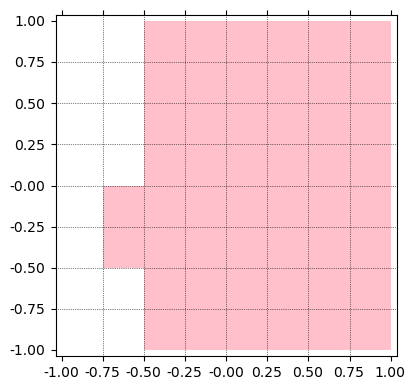

In [48]:
q

In [ ]:
q = csig.F(RIF(2)).plot_histogram2d(4)

In [ ]:
q.show()

In [ ]:
sig = csig.refined_signal(2)

In [ ]:
sig.plot()

In [ ]:
sig = csig.refined_signal(3)

In [ ]:
sig.plot()

In [ ]:
sig2 = Atomic(x - 1.19).signal_for_system(vf, v3, 5, order=5, step=(0.01, 0.5),
                                   precondition=1,
                                   estimation=1e-3,
                                   integrationScheme=2,
                                   cutoff_threshold=1e-5,
                                   symbolic_composition=True)
sig2.plot()

In [ ]:
csig2 = Atomic(x - 1.2).context_signal_for_system(vf, v3, 5, order=5, step=(0.01, 0.5),
                                   precondition=1,
                                   estimation=1e-3,
                                   integrationScheme=2,
                                   cutoff_threshold=1e-5,
                                   symbolic_composition=True)
csig2.signal.plot()

In [ ]:
csig2.refined_signal(1).plot()

In [ ]:
(csig.refined_signal(1) | csig2.refined_signal(1)).plot()

In [ ]:
(csig | csig2).refined_signal(1).plot()

In [ ]:
sig = (csig.refined_signal(2) | csig2.refined_signal(2))

In [ ]:
sig.plot()

In [ ]:
(csig | csig2).refined_signal(2).plot()

In [ ]:
sig = (csig | csig2).refined_signal(3)

In [ ]:
sig.plot()

## Polynomial plot

In [ ]:
reach = Reach(vf, v3, 10,
              order=5, step=(0.01, 0.5),
              precondition=1,
              estimation=1e-3,
              integrationScheme=2,
              cutoff_threshold=1e-7,
              symbolic_composition=True)

In [ ]:
reach.wplot('x', 'y')

In [ ]:
p1 = p + reach.sage_interval_plot('x', 'y',
                                  poly=(x - 1)^2 + y^2 - 0.2,
                                  aspect_ratio='automatic')
p1

In [ ]:
p1.save("/home/twright/Documents/PhD/Posters/PPAR Poster 4/images/phase_portrait.svg")

## Context

In [ ]:
kwargs = dict(
    order=5, step=(0.01, 0.5),
    precondition=1,
    estimation=1e-3,
    integrationScheme=2,
    cutoff_threshold=1e-5,
    verbosity=0,
    epsilon_ctx=0.1,
    symbolic_composition=True,
)
args = (vf, v3, 7)

In [ ]:
{x: RIF(0.05,0.1)} >> G(RIF(0,0.2), P)

In [ ]:
sig = ({x: RIF(0.05,0.1)} >> G(RIF(0,0.2), P)
       ).signal_for_system(vf, v3, 10, **kwargs)

In [ ]:
sig.plot()

### Context $\rightarrow$ Context Signal

In [ ]:
ctx_sig = ({x: RIF(0.05,0.1)} >> G(RIF(0,0.2), P)
           ).context_signal_for_system(vf, v3, 10, **kwargs)
ctx_sig

In [ ]:
sig = ctx_sig.signal

In [ ]:
sig.plot()

In [ ]:
sig = ctx_sig.refined_signal(1)

In [ ]:
sig.plot()

In [ ]:
ctx_sig = ({x: RIF(0.05,0.1)} >> G(RIF(0,0.2), P)
           ).context_signal_for_system(vf, v3, 10, refine=1, **kwargs)
ctx_sig

In [ ]:
sig = ctx_sig.signal

In [ ]:
sig.plot()

In [ ]:
sig = ctx_sig.refined_signal(1)

In [ ]:
sig.plot()

In [ ]:
sig = ctx_sig.refined_signal(2)

In [ ]:
sig.plot()

## Differential Context

In [ ]:
{x: RIF(6,7)} % G(RIF(0,0.2), P)

In [ ]:
# Use symbolic remainders for context jump 
kwargs['integrationScheme'] = 7

In [ ]:
kwargs['verbosity'] = 10

In [ ]:
kwargs['symbolic_composition'] = True

In [ ]:
sig = ({x: RIF(6)} % G(RIF(0,0.2), P)
       ).signal_for_system(vf, v3, 10, **kwargs)

In [ ]:
sig.plot()

In [ ]:
sig = ({x: RIF(6, 6.1)} % G(RIF(0,0.2), P)
       ).signal_for_system(vf, v3, 10, **kwargs)

In [ ]:
sig.plot()

In [ ]:
ctx_sig = ({x: RIF(6, 6.1)} % G(RIF(0,0.2), P)
          ).context_signal_for_system(vf, v3, 10, **kwargs)
ctx_sig

In [ ]:
sig = ctx_sig.signal
sig

In [ ]:
sig.plot()

In [ ]:
sig = ctx_sig.refined_signal(1)

In [ ]:
sig.plot()

In [ ]:
ctx_sig = ({x: RIF(6, 6.1)} % G(RIF(0,0.2), P)
          ).context_signal_for_system(vf, v3, 10, refine=1, **kwargs)
ctx_sig

In [ ]:
sig = ctx_sig.refined_signal(1)

In [ ]:
sig.plot()

## More complex property (implication)

In [ ]:
phi = G(RIF(0, 1),
  ~(Atomic(y - RIF(5.5)) | (
      {'x': RIF(0.3, 0.35)} >> G(RIF(0, 4), Atomic(y - 3)))))
phi

In [ ]:
v3

In [ ]:
v4 = [RIF(0.25, 0.3), RIF(6, 6.5)]

In [ ]:
csig = phi.context_signal_for_system(vf, v4, 5, order=5, step=0.01,
                                     precondition=1,
                                     estimation=1e-3,
                                     integrationScheme=2,
                                     cutoff_threshold=1e-5,
                                     symbolic_composition=True)

In [ ]:
sig = csig.signal
sig

In [ ]:
sig.plot()

In [ ]:
sig1 = csig.refined_signal(1)

In [ ]:
sig1.plot()

In [ ]:
p = csig.F(RIF(2)).plot_histogram2d(3)

In [ ]:
p.show()

In [ ]:
block_matrix(2, 2, [matrix([[1]]), matrix([[2]]), matrix([[3]]), matrix([[4]])])

In [ ]:
m = block_matrix(2, 2, [matrix([[1]]), matrix([[3]]), matrix([[2]]), matrix([[4]])])
m

In [ ]:
m.transpose()

In [ ]:
matrix_plot(m.transpose()[::-1, :], colorbar=True)